## <font color='blue'>Regularization and Cross-Validations</font>

### <font color='blue'> When Linear Regression Fails </font>

In this context *fails* means that OLS is unable to provide a unique solution, such as a unique set of coefficients for the input variables.

Plain *vanilla* multiple linear regression (OLS) fails if the number of observations is smaller than the number of features.


**Example:** If the dependent variable is the Sales Price, we cannot uniquely determine the weights for the features if we have only 4 observations.


| Dist. to School | Prop. Area | Housing Area | Value | Prop. Tax | Bathrooms | Sales Price |
|----------------:|-----------:|-------------:|------:|----------:|----------:|------------:|
|               7 |        0.4 |         1800 |   234 |       9.8 |         2 |       267.5 |
|             2.3 |        0.8 |         1980 |   244 |      10.5 |       2.5 |       278.2 |
|             4.3 |        1.1 |         2120 |   252 |      16.2 |         3 |       284.5 |
|             3.8 |        0.6 |         2500 |   280 |      18.4 |       3.5 |       310.4 |


Suppose we want to predict the "Sales Price" by using a <font color='red'>linear combination</font> of the feature variables, such as "Distance to School", "Property Area", etc.

$$\large M\cdot \vec{\beta} = \beta_1\cdot col_1(M)+\beta_2\cdot col_2(M)+...+\beta_p\cdot col_p(M)$$

The Ordinary Least Squares (OLS) method aims at finding the coefficients $\beta$ such that the the sum or squared errors is minimal, i.e.

$$\large \underset{\beta}{\operatorname{argmin}}\|\text{Sales Price}- M\cdot \vec{\beta}\|^2$$

**Important Question**: Why does OLS fail in this case? Hint: the problem to solve is ill-posed, in the sense that it allows many perfect solutions.
              

### <font color= 'blue'> What does Rank Deficiency mean, and why we need Regularization?</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviatin of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large
X^tY = X^tX\beta+\sigma X^t\epsilon
$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

We can test whether the matrix $X^tX$ is invertible by simply computing its determinant and checking that it is not zero.

### IMPORTANT: When the matrix $X^tX$ is not invertible we cannot apply this method to get $\mathbb{E}(\beta)$. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.


###  <font color='blue'>A solution for rank defficient Multiple Linear Regression: L2 (Ridge) Regularization</font>

#### <font color='red'> Main Idea: minimize the sum of the square residuals plus a constraint on the vector of weights</font>

The L2 norm is

$$
\|\beta\|_2:=\left(\sum_{j=1}^{p}\beta_j^2\right)^{1/2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $\alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter ("tunning" parameter).

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

**Important**: What happens with the solution $\beta$ when the hyperparameter $\alpha$ grows arbitrarily large? Hint: generate a mapping and plot the coefficient paths.

### <font color= 'blue'> L1 (Lasso) Regularization</font>

The L1 norm is

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

### <font color='blue'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.


<figure>
<center>
<img src='https://i.imgur.com/J8Mda3S.png'
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


### <font color='blue'> Geometric comparison in 2D between L1 and L2 norms

<figure>
<center>
<img src='https://i.imgur.com/e9EEJL7.png'
width='700px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


### <font color= 'blue'> Elastic Net Regularization </font>

The main idea is to combine the L2 and L1 regularizations in a *weighted* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$ is called the L1_ratio.

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this regularization approach we have two hyper-parameters that we need to decide on. **Think:** how can we determine the best choice of hyper-parameters?

## <font color= 'blue'> Model Validation via k-Fold Cross-Validations</font>

In general: how do we know that the predictions made are good?

For many applications you can think of a data set representing both “present” and “future.”

<a href="https://imgur.com/sWRVXjk"><img src="https://i.imgur.com/sWRVXjk.png" title="Train-Test Split" /></a>


In order to compare the predictive power of different models we use K-fold cross-validation.

How do we get unbiased estimates of errors?

<a href="https://imgur.com/LCNRuF3"><img src="https://i.imgur.com/LCNRuF3.png" title="CV" /></a>

Example schematic of 5-fold cross-validation:


<figure>
<center>
<img src='https://i.imgur.com/SzeE4st.png'
width='550px' />
<figcaption>Step 1 in the 5-fold cross-validation</figcaption></center>
</figure>



### <font color='blue'> Code Applications </font>

---

#### Setup

In [ ]:
import os
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Data Sets')
  !pip install -q pygam
else:
  print('Running locally')
  os.chdir('../Data')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import ElasticNet, Ridge, Lasso
from yellowbrick.regressor import ResidualsPlot

### Data Import

In [3]:
data_housing = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/housing.csv?raw=true')
data_concrete = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/concrete.csv?raw=true')

### Coefficient Paths

In [ ]:
feats = ['crime','residential','industrial','nox','rooms','older','distance','highway','tax','ptratio','lstat']
X = data_housing[feats]
y = data_housing['cmedv'].values

In [ ]:
scale = StandardScaler()
Xs = scale.fit_transform(X)

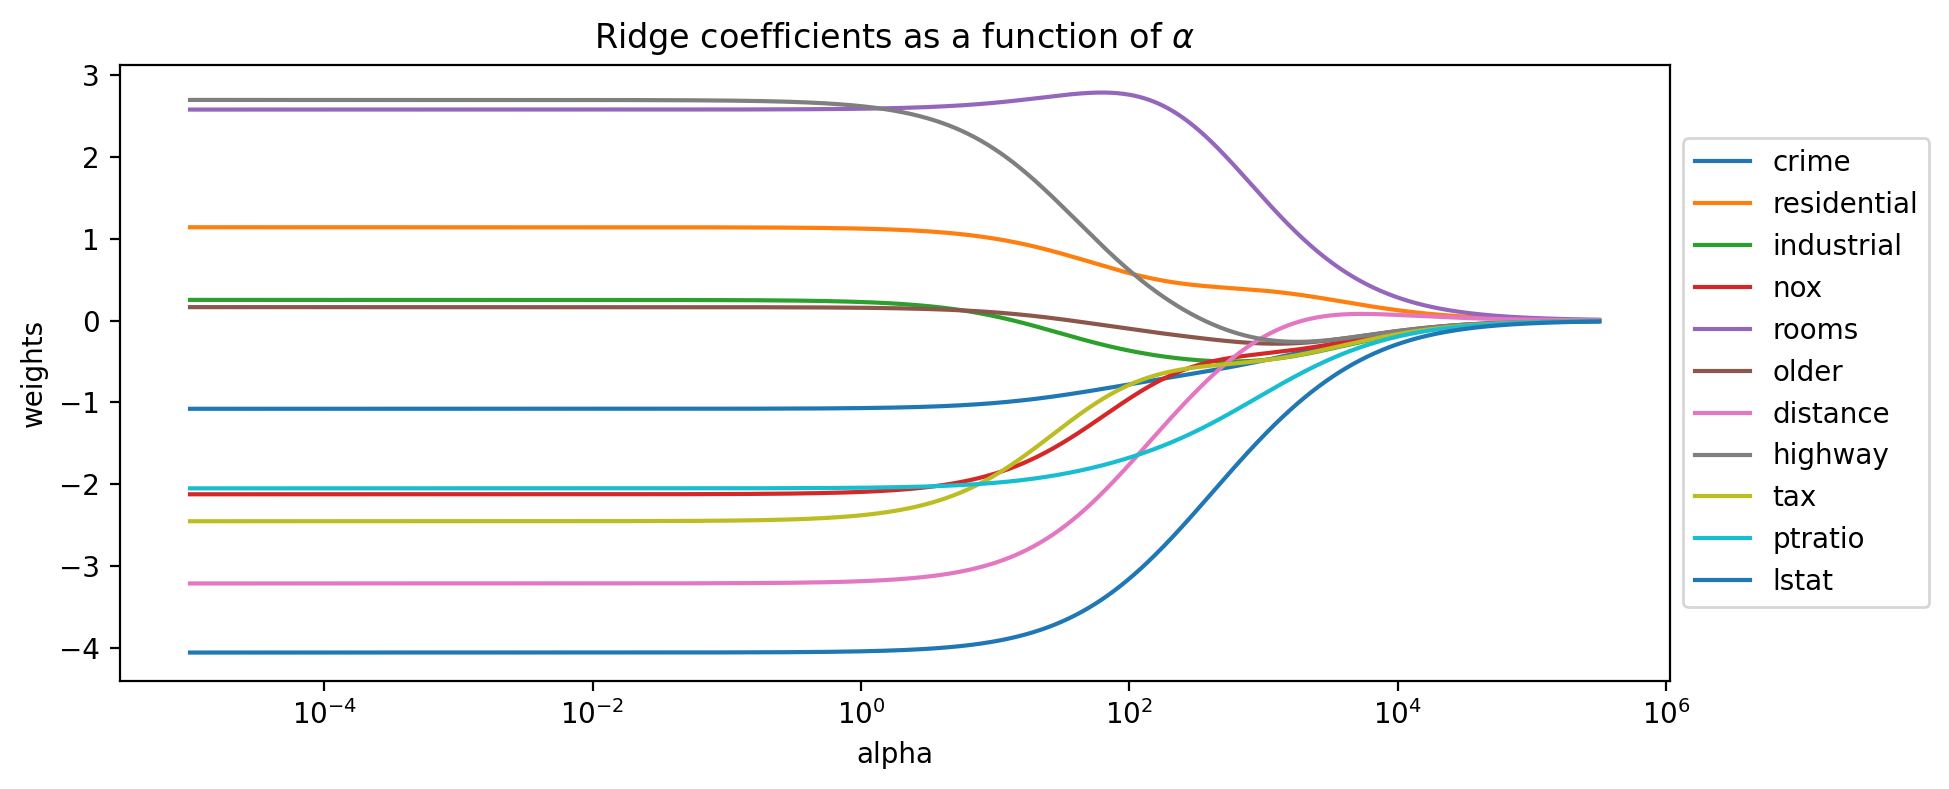

In [ ]:
# generate the coefficients for Ridge regression and many values of alpha
n_alphas = 2000
alphas = np.logspace(-5, 5.5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(Xs, y)
    coefs.append(ridge.coef_)

# Display coefficient paths Ridge
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of $\\alpha$')
plt.axis('tight')
plt.legend(feats, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

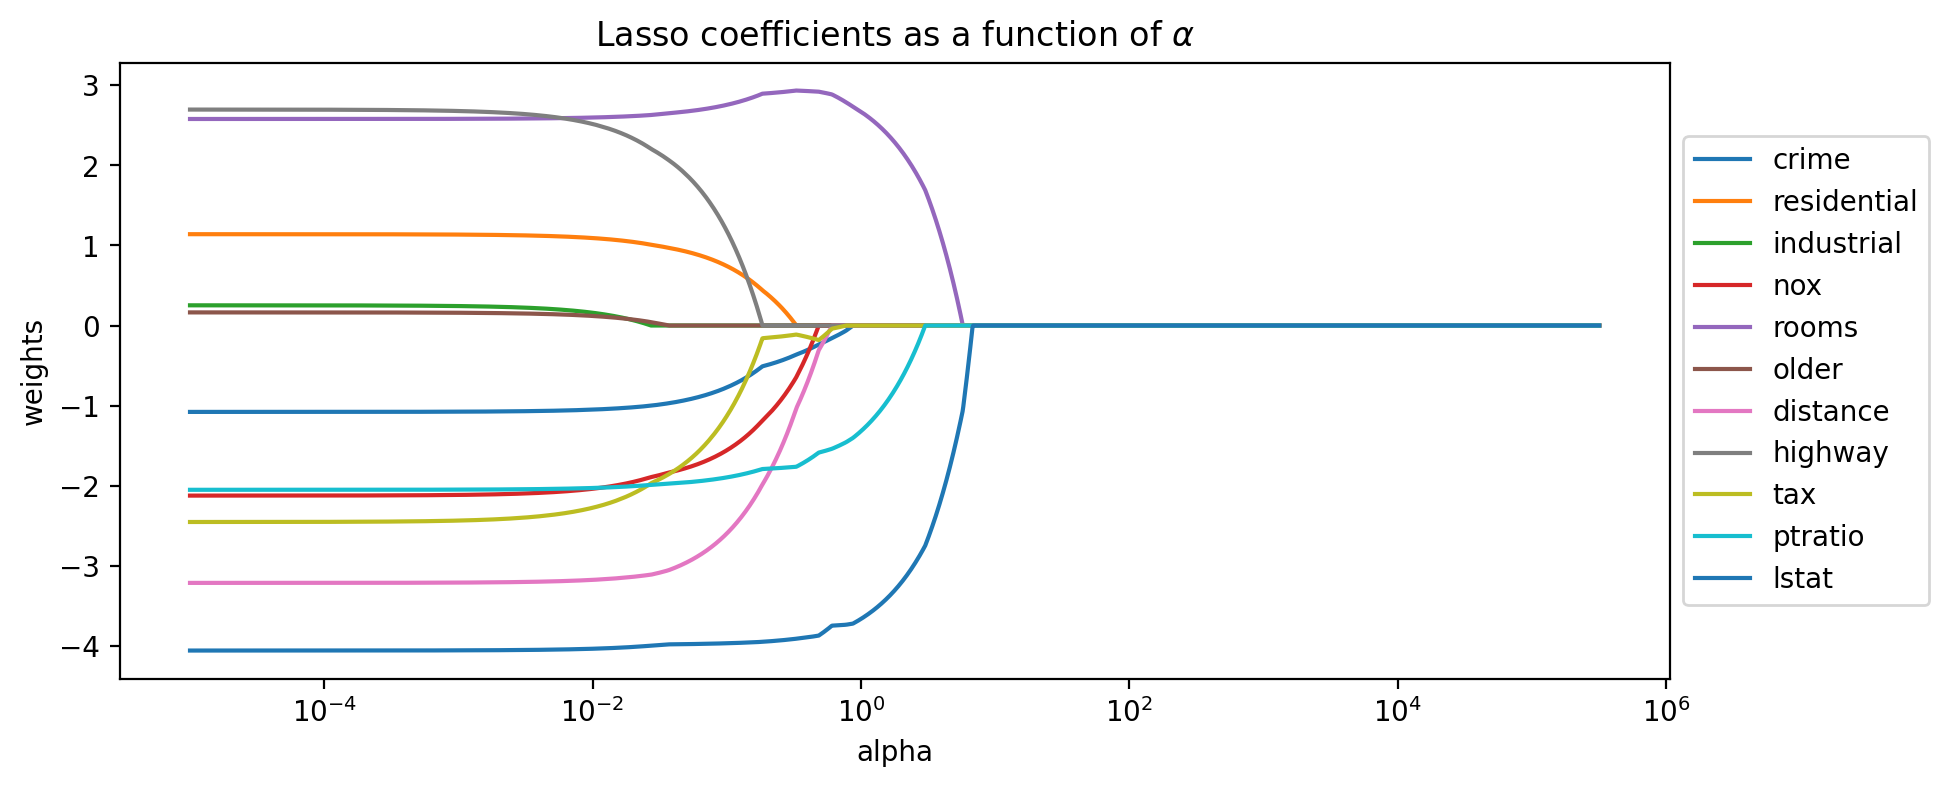

In [ ]:
# generate the coefficients for Ridge regression and many values of alpha
n_alphas = 2000
alphas = np.logspace(-5, 5.5, n_alphas)

coefs = []
for a in alphas:
    model = Lasso(alpha=a, fit_intercept=False)
    model.fit(Xs, y)
    coefs.append(model.coef_)

# Display coefficient paths Ridge
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of $\\alpha$')
plt.axis('tight')
plt.legend(feats, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

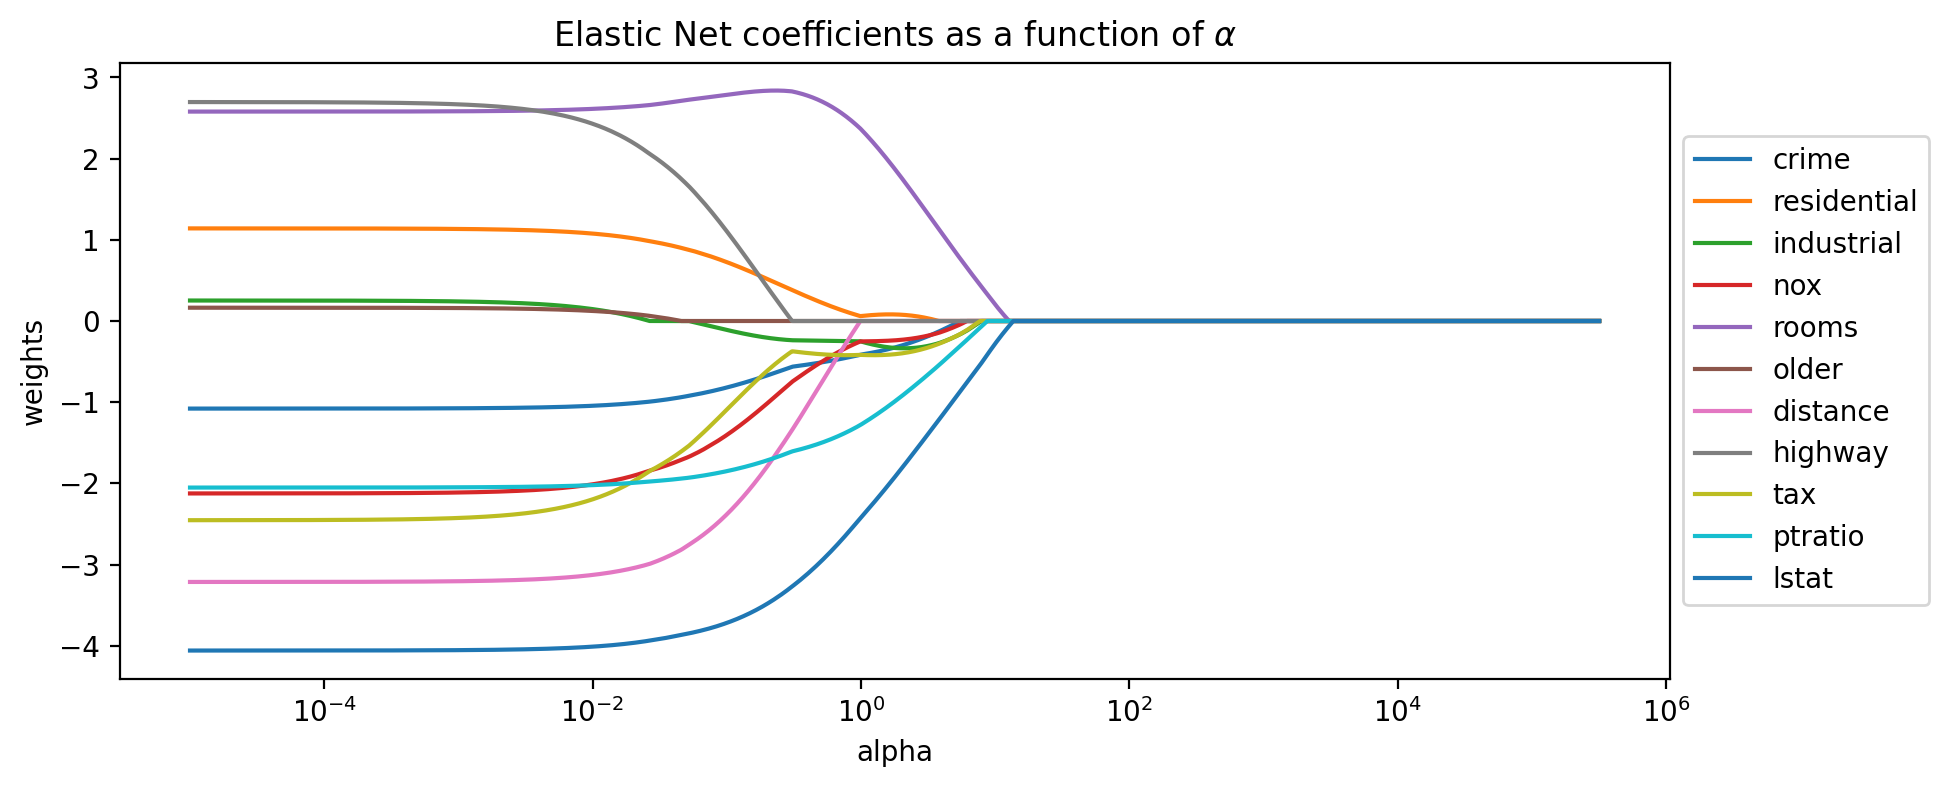

In [ ]:
# generate the coefficients for Ridge regression and many values of alpha
n_alphas = 2000
alphas = np.logspace(-5, 5.5, n_alphas)

coefs = []
for a in alphas:
    model = ElasticNet(alpha=a, fit_intercept=False)
    model.fit(Xs, y)
    coefs.append(model.coef_)# generate the coefficients for Ridge regression and many values of alpha
n_alphas = 2000
alphas = np.logspace(-5, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(Xs, y)
    coefs.append(ridge.coef_)

# Display coefficient paths Ridge
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Elastic Net coefficients as a function of $\\alpha$')
plt.axis('tight')
plt.legend(feats, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

### Example for the Distribution of the Residuals

In [5]:
y = data_concrete['strength']
x = data_concrete.drop(columns='strength')

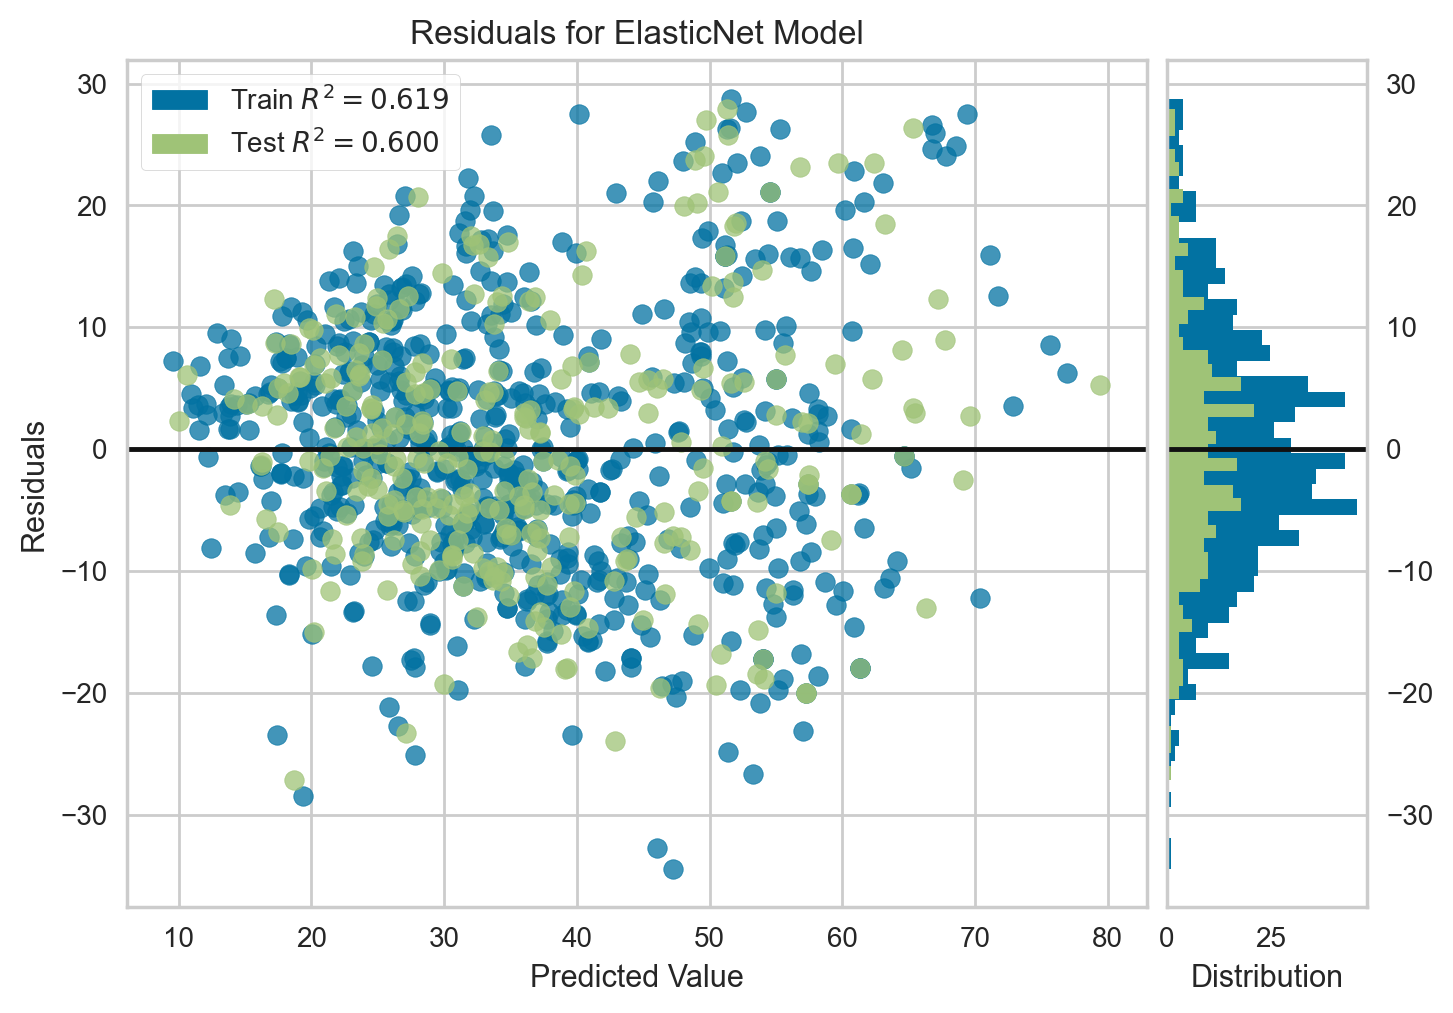

In [7]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

# Instantiate the linear model and visualizer
model = ElasticNet(alpha=0.01)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
plt.show()